In [1]:
import os
import sys
parent_dr = os.path.split(os.getcwd())[0]
if parent_dr not in sys.path:
    sys.path.append(parent_dr)

In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.sparse as sp
import scipy.linalg as sla
from sklearn.decomposition import NMF, TruncatedSVD
import numpy.linalg as la
from time import time
from core.data.arxiv_data_io import *
from core.data.text.tf_idf_helpers import *
from core.matrix.svd_decomposition_helpers import *
from core.matrix.nmf_decompositions import *

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [4]:
#reading in the full arXiv subset df
file_name = "tokenized_arxiv_subset_15540.pkl"
full_path = os.path.join(parent_dr, "core", "resources", file_name)
data_df = pd.read_pickle(full_path)

In [5]:
# splitting out the test and train dfs
train_df, test_df = sample_arxiv_data_by_category(data_df)
assert len(train_df)/len(data_df) == 0.8

In [8]:
train_tokens = train_df['tokens']
tfidf_obj, index_to_word = fit_tfidf(train_df['tokens'])

In [9]:
tfidf_train_matrix, index_to_doc = transform_tfidf(train_df,tfidf_obj=tfidf_obj)

In [10]:
df = pd.DataFrame.sparse.from_spmatrix(tfidf_train_matrix)

# SVD Feature Interpretation

In [11]:
#Reading in full SVD
U_file_name = "tfidf_train_full_svd_U.pkl"
U_file_path = os.path.join(parent_dr, "notebooks", "output", U_file_name)
U = np.load(U_file_path, allow_pickle=True)

VT_file_name = "tfidf_train_full_svd_V_T.pkl"
VT_file_path = os.path.join(parent_dr, "notebooks", "output", VT_file_name)
VT = np.load(VT_file_path, allow_pickle=True)

S_file_name = "tfidf_train_full_svd_sigmas.pkl"
S_file_path = os.path.join(parent_dr, "notebooks", "output", S_file_name)
S = np.load(S_file_path, allow_pickle=True)

print(f'U_from_pkl has dimensions: {U.shape}')
print(f'V_T_from_pkl has dimensions:{VT.shape}')
print(f'Number of singluar values:{S.shape}')

U_from_pkl has dimensions: (12432, 12431)
V_T_from_pkl has dimensions:(12431, 30460)
Number of singluar values:(12431,)


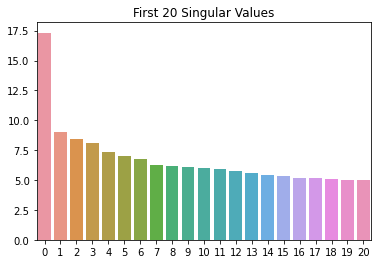

In [12]:
S_20 = S[:21]
sns.barplot(x=list(range(len(S_20))), y = S_20)
plt.title("First 20 Singular Values")
plt.show()

In [14]:
V = VT.T
term_topic_matrix = pd.DataFrame(data=V, 
                                 columns = [f'Latent_concept_{r}' 
                                            for r in range(0,V.shape[1])])

term_topic_matrix.head()

Latent_concept_0  Latent_concept_1  Latent_concept_2  Latent_concept_3  \
0         -0.009584         -0.002554          0.007268         -0.003623   
1          0.012405         -0.001554          0.005451          0.005901   
2         -0.009098         -0.003125         -0.002263         -0.001121   
3          0.007511         -0.018191          0.005976          0.001429   
4          0.001212         -0.017279         -0.008265          0.007174   

   Latent_concept_4  Latent_concept_5  Latent_concept_6  Latent_concept_7  \
0         -0.000891         -0.000812          0.000641          0.000583   
1         -0.000735         -0.001192          0.000420          0.001439   
2         -0.001781         -0.001625          0.001282          0.001166   
3          0.000113          0.005312          0.001714         -0.000831   
4         -0.000269         -0.000276          0.000003         -0.000209   

   Latent_concept_8  Latent_concept_9  Latent_concept_10  Latent_concept_11  \
0          0.000229         -0.001285          -0.000741           0.002239   
1         -0.000494         -0.000584           0.000136           0.000471   
2          0.000457         -0.002570          -0.001483           0.004477   
3          0.002879         -0.001694           0.000255          -0.001299   
4         -0.000006         -0.000124           0.000179          -0.000226   

   Latent_concept_12  Latent_concept_13  Latent_concept_14  Latent_concept_15  \
0          -0.000841          -0.001928          -0.000178           0.000507   
1          -0.000018          -0.001273          -0.000758           0.000272   
2          -0.001682          -0.003856          -0.000356           0.001015   
3           0.002074           0.001191          -0.003423           0.006636   
4          -0.000632           0.000736           0.000686          -0.000062   

   Latent_concept_16  Latent_concept_17  Latent_concept_18  Latent_concept_19  \
0          -0.000417          -0.000716           0.001210          -0.000907   
1          -0.000426           0.000560           0.000614          -0.002105   
2          -0.000834          -0.001433           0.002419          -0.001813   
3          -0.003256           0.001116           0.001057           0.001335   
4           0.001993           0.001224           0.000586           0.000397   

   Latent_concept_20  Latent_concept_21  Latent_concept_22  Latent_concept_23  \
0           0.000170           0.001658          -0.001063          -0.001544   
1          -0.000075           0.001407          -0.001013           0.001070   
2           0.000340           0.003317          -0.002125          -0.003088   
3          -0.004101           0.000702           0.000141           0.000250   
4           0.000391          -0.000185          -0.000442          -0.000238   

   Latent_concept_24  Latent_concept_25  Latent_concept_26  Latent_concept_27  \
0          -0.000640           0.000112           0.000782          -0.000133   
1           0.001132           0.000181           0.000702          -0.001425   
2          -0.001281           0.000223           0.001564          -0.000266   
3          -0.001645           0.006072           0.001173          -0.001002   
4          -0.000655           0.000896           0.000244          -0.000500   

   Latent_concept_28  Latent_concept_29  Latent_concept_30  Latent_concept_31  \
0          -0.001130          -0.000775           0.001266           0.001821   
1           0.001090           0.000790           0.000431           0.001397   
2          -0.002259          -0.001550           0.002533           0.003643   
3          -0.000499          -0.001025           0.001164          -0.003551   
4          -0.000764           0.000878          -0.000378           0.000524   

   Latent_concept_32  Latent_concept_33  Latent_concept_34  Latent_concept_35  \
0           0.001264          -0.001245           0.000076          -0.000735   
1    

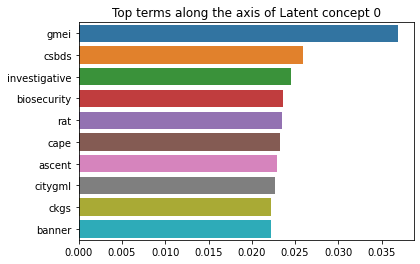

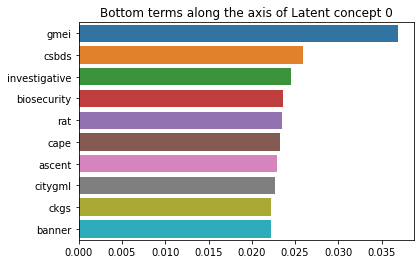

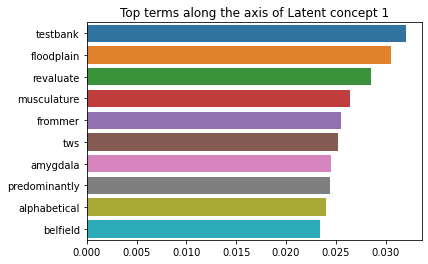

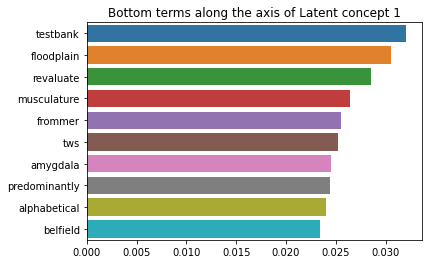

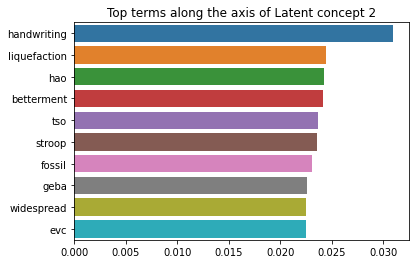

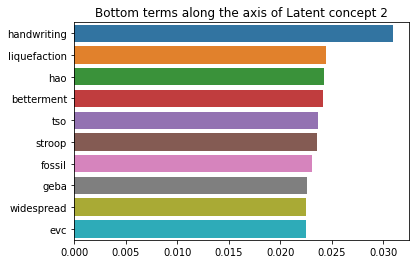

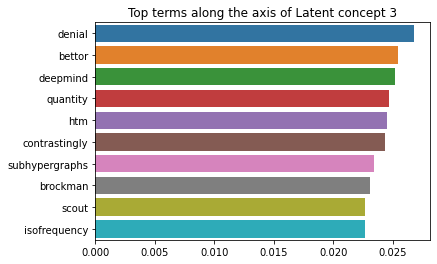

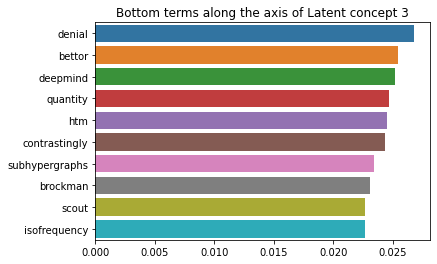

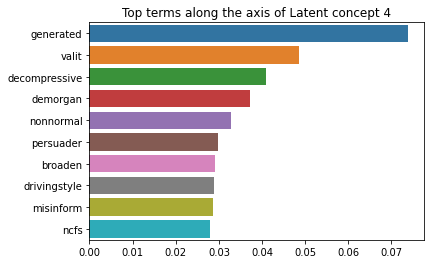

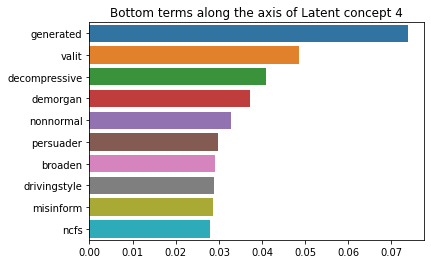

In [21]:
for i in range(5):
    data = term_topic_matrix[f'Latent_concept_{i}']
    data = data.sort_values(ascending=False)
    top_10 = data[:10]
    top_10 = top_10.rename(index=index_to_word)
    plt.title(f'Top terms along the axis of Latent concept {i}')
    fig = sns.barplot(x=top_10.values , y=top_10.index, orient = 'h')
    plt.show()
    plt.close()
    
    bot_10 = data[:-10]
    bot_10 = top_10.rename(index=index_to_word)
    plt.title(f'Bottom terms along the axis of Latent concept {i}')
    fig = sns.barplot(x=bot_10.values , y=bot_10.index, orient = 'h')
    plt.show()
    plt.close()

# NMF Feature Interpretation

In [16]:
n_samples, n_features = tfidf_train_matrix.shape
k = 5

In [17]:
#this takes about a minute
print("Fitting the NMF model with n_samples=%d and n_features=%d, and n_components=%d..."
      % (n_samples, n_features, k))

nmf_model = NMF(n_components = k, 
                init='nndsvd', 
                max_iter=1000,
                random_state=1)
W = nmf_model.fit_transform(tfidf_train_matrix)

H = nmf_model.components_

Fitting the NMF model with n_samples=12432 and n_features=30460, and n_components=5...


In [19]:
n_words = 10
topic_list = []
for topic_idx, topic in enumerate(nmf_model.components_):
    top_n = [index_to_word[i]
             for i in topic.argsort()
             [-n_words:]][::-1]
    top_features = ' '.join(top_n)
    topic_list.append(f"topic_{'_'.join(top_n[:3])}") 

    print(f"Topic {topic_idx}: {top_features}")

Topic 0: problem algorithm set model decision constraint belief probability method approach
Topic 1: number graph vertex edge algorithm time problem free color tree
Topic 2: datum system technology student ai research user information number study
Topic 3: network brain model neuron neural spike activity dynamic stimulus connectivity
Topic 4: agent game learn learning environment reinforcement action task policy human
